# **Project Name -Online Retail Customer Segmentation - Capstone Project**

**Project Type -Unsupervised**

**Contribution - Individual**

**Name - Shivam Dhoundiyal** 



# **Project Summary**

The main objective of our project was to identify the significant customer segments using a one-year historical transactional dataset of a UK-based online retail store. By segregating customers based on transaction data, we aimed to assist the company in making better marketing decisions and strategies. 

For a company to generate good revenue, it is imperative to make effective decisions, especially given the huge competition and diverse strategies of companies today. To make proper decisions, data should be used. Since every person is different, we cannot know what they buy or their preferences. However, machine learning techniques can be applied to sort and analyze data, enabling the identification of target groups through various algorithms. Without such techniques, finding a group of people with similar interests and characteristics in a large dataset can be extremely difficult. Customer segmentation can help businesses focus on each customer group differently, maximizing benefits for both customers and the business.

Once we completed the preliminary data exploration and cleaning, we identified relationships between features through exploratory data analysis (EDA). After this, we proceeded to the RFM analysis portion of the project.

We applied multiple unsupervised machine learning algorithms, including KMeans Clustering and Hierarchical Clustering (specifically Agglomerative Clustering). To determine the ideal number of clusters, we utilized the Elbow method and Silhouette Score, as well as a Silhouette Plot to visualize the clusters with varying numbers. In the case of Agglomerative Clustering, we utilized a Dendogram to determine the optimal number of clusters.

First, we imported the necessary libraries and the dataset which was in an Excel file. The dataset had 541909 rows and 8 columns. We then checked for duplicated data and null values. There were more than 120,000 null values present in the CustomerID column, which is the main column. We dropped all these values.

To visualize outliers, we plotted various graphs and applied the Interquartile Range method. RFM analysis was used to segment customers into homogenous groups quickly, using a set of minimum variables. We defined a scoring system and ranged it differently to get a better result for clustering steps. It's better to segment using RFM scoring rather than using the raw calculated RFM values. Further analysis on the spending behavior should be done on the raw values for the targeted cluster to expose more insight and characteristics.

RFM analysis solely depends on purchasing behavior and histories. The analysis can be improved further by exploring weighted composite scoring or by including customer demographic information and product information. A good analysis can increase the effectiveness and efficiency of marketing plans, and thus increase profitability at a minimum cost.


- The data had different units, so we used the Standard Scaler to scale and normalize it.
- To determine the number of clusters, we used the Elbow Method and Silhouette Score, and selected the cluster size based on the visualized graph.
- We applied K-Means Clustering to the data.
- We also used Dendrogram Linkage and Hierarchical Agglomerative Clustering models.
- We started with a simple binning and quantile-based segmentation model, then moved to more complex models.
- We used k-means clustering and visualized the results with different numbers of clusters, but we kept in mind that there is no guarantee that k-means will lead to the best solution.
- We also tried Hierarchical Clustering as an alternative.

# **GitHub Link -**

[github link](https://github.com/shivamdhoundiyal96/Online_Retail_Customer_Segmentation_Capstone_Project.git)

# <b><u> Project Title : Online Retail Customer Segmentation

Customer segmentation is a widely used technique among e-commerce retail companies to improve their top line and bottom line. By segmenting customers, companies can gain insights into customer preferences, purchasing behavior, frequency of purchases, timing of purchases, seasonal patterns, and top-selling products. 

The main objective is to better understand customers and maximize their value to the business by tailoring marketing and sales strategies for each segment.



# **BUSINESS PROBLEM OVERVIEW**




## <b> Problem statement </b>

### The objective of this project is to identify the major customer segments using a transnational dataset. The dataset contains all the transactions that took place between 01/12/2010 and 09/12/2011 for a UK-based online retail store that primarily sells unique gifts for all occasions. The company has a significant number of wholesale customers.



### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **General Guidelines**

Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



---



# **Let's begin !**

# **1. Know Your Data**

# Importing libraries

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

In [148]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


# Dataset Loading

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#loading the datasets
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')

# Dataset First view

In [151]:
#first look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [152]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


# Dataset Rows & Columns count

In [153]:
#checking the shape 
df.shape

(541909, 8)


Total Rows= 541909

Total features=8


# Dataset Information

In [154]:
#checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Type of the data values

In [155]:
#checking the data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Missing Values , Null Values

In [156]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [157]:
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


 Customer id - 135080(25% missing values)
 Description - 1454 (0.27% missing val)


# Check Unique Values for each variable.

In [158]:
# Looking for Unique Values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# What did you know about your dataset?


The given dataset is for a UK-based online retail company that primarily sells unique gifts for all occasions. The dataset consists of all the transactions that took place between 01/12/2010 and 09/12/2011.

 It contains 541909 rows and 8 columns. The dataset has some missing values, specifically 25% of the Customer ID column and 0.3% of the Description column.

# **2. Understanding Your Variables**

In [159]:
#check what are the columns are in the dataset 
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [160]:
#descriptive summery of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Variables Description

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides 

# **3. Data Wrangling**

In [161]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [162]:
#Handling the missing values
#Customer id is irrelavant so dropping
#df.drop.('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [163]:
#confirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [164]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

In [165]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# What all manipulations have you done and insights you found?

in my point of view we get a clear idea about the dataset . In our data, there is a feature called Customer-ID which has more than 25% missing values,(120000 ) hence there is no use in having the data with no customer assignment.We have encountered some duplicated observations in the dataset, when we have frequent duplicates in our database, we may inadvertently send multiple clustering messages to the same person CustomerID. As a Consequence, we dropped it. 


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart 1 -STOCKCODE** - barplot

In [166]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head(10)

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


[Text(0, 0, '85123A'),
 Text(1, 0, '22423'),
 Text(2, 0, '85099B'),
 Text(3, 0, '84879'),
 Text(4, 0, '47566'),
 Text(5, 0, '20725'),
 Text(6, 0, '22720'),
 Text(7, 0, '20727'),
 Text(8, 0, 'POST'),
 Text(9, 0, '23203')]

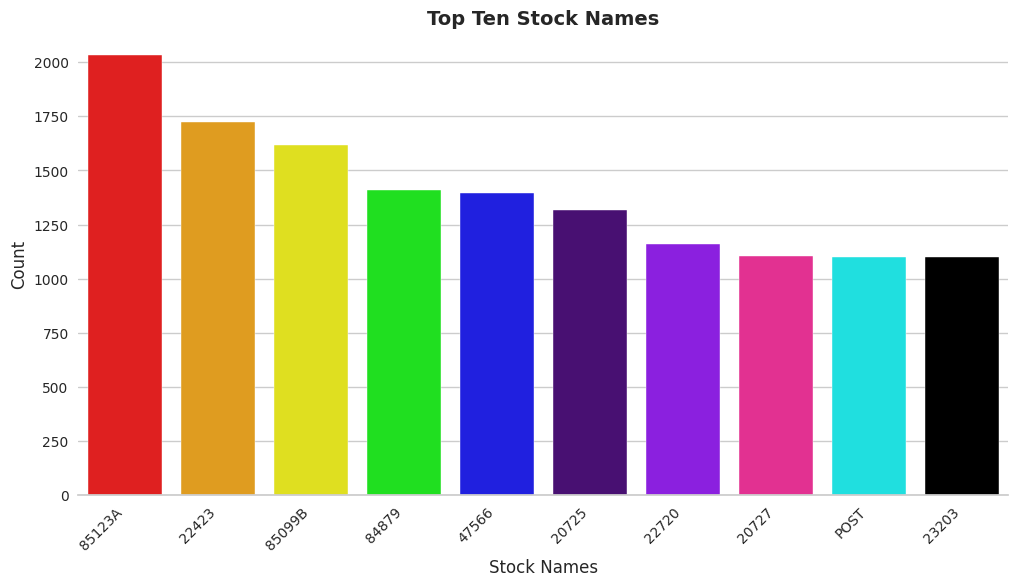

In [167]:
# Define color palette
colors = ['#ff0000', '#ffa500', '#ffff00', '#00ff00', '#0000ff', '#4b0082', '#8f00ff', '#ff1493', '#00ffff', '#000000']

# Create the barplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[:10], ax=ax, palette=colors)

# Customize plot appearance
ax.set_title('Top Ten Stock Names', fontsize=14, fontweight='bold')
sns.set_style('whitegrid')
sns.despine(left=True)
ax.set_xlabel('Stock Names', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


In [168]:
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


[Text(0, 0, '90168'),
 Text(1, 0, '90169'),
 Text(2, 0, '90202A'),
 Text(3, 0, '90118'),
 Text(4, 0, '23843')]

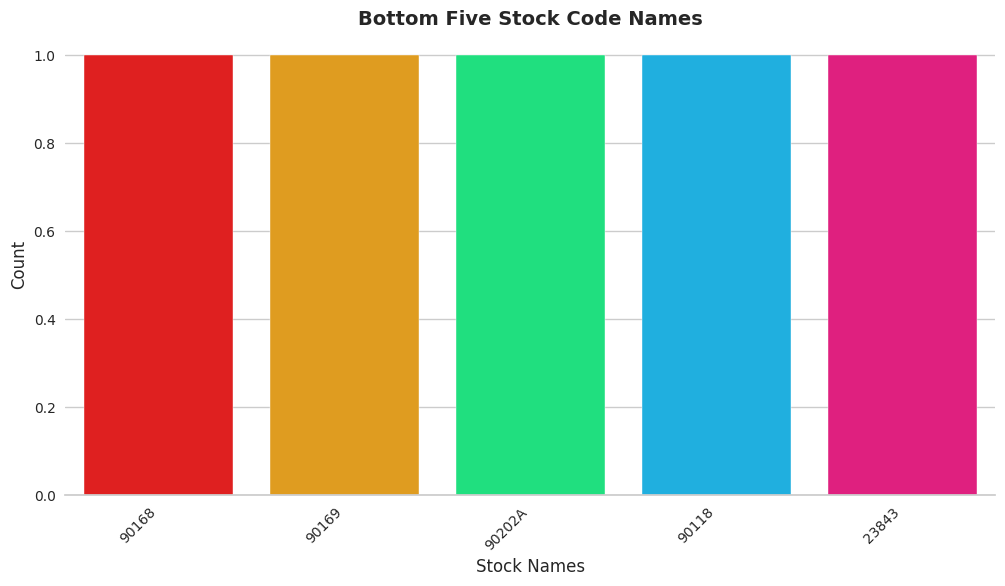

In [169]:
# Define color palette
colors = ['#ff0000', '#ffa500', '#00ff7f', '#00bfff', '#ff007f']

# Create the barplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[-5:], ax=ax, palette=colors)

# Customize plot appearance
ax.set_title('Bottom Five Stock Code Names', fontsize=14, fontweight='bold')
sns.set_style('whitegrid')
sns.despine(left=True)
ax.set_xlabel('Stock Names', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# 1. Why did you pick the specific chart?



Bar charts display how often different categories or labels appear in a dataset. They can also include additional information like the percentage of occurrences for each category.

# 2. What is/are the insight(s) found from the chart?



Here we plotted on the basis of stoke code , then we get stokecode 85123A is the first highest selling product .And 22423 is the second highest selling product.

# 3.Will the insights gained from data analysis help create a positive impact on business outcomes? Can any insights have a negative impact on growth? Please provide specific reasons to justify your answer.

The chart and table provide insights into customer preferences and dislikes. When examining the graph for the least stocked items, the values are fairly consistent across the board.

# **Chart 2 - Invoice date**

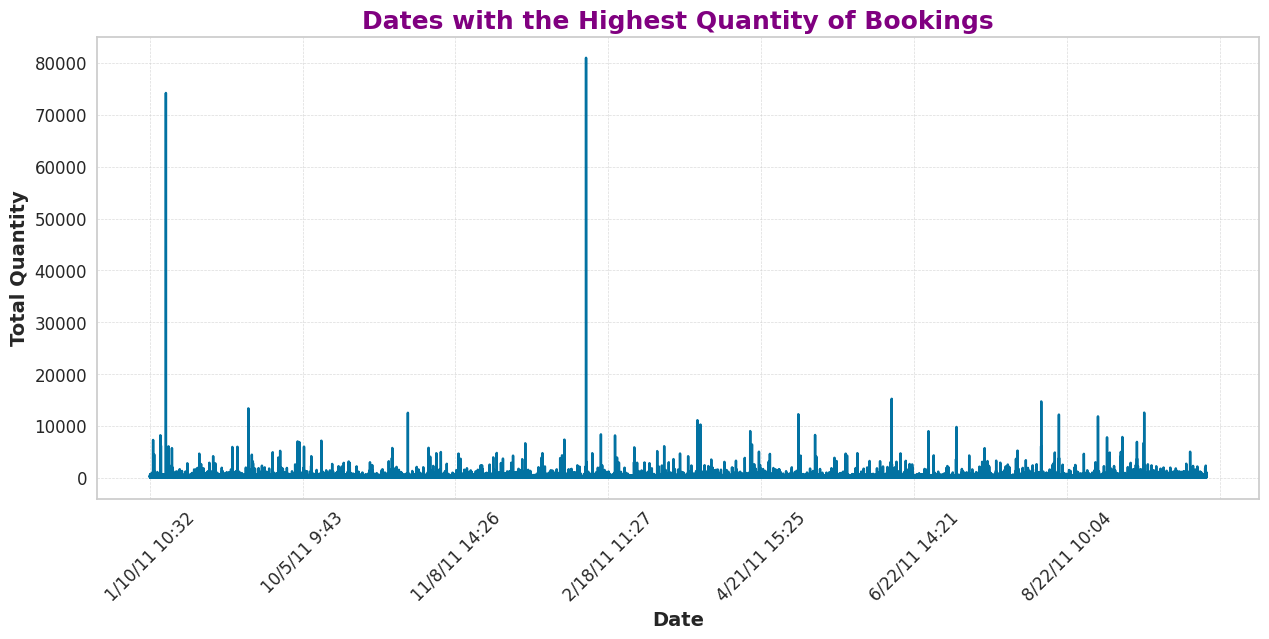

In [170]:
import matplotlib.pyplot as plt

# Plot the total quantity of bookings by date
df.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))

# Customize plot appearance
plt.title('Dates with the Highest Quantity of Bookings', fontsize=18, fontweight='bold', color='purple')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Total Quantity', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


# 1-Why did you pick the specific chart?



That is a simple line graph that uses lines to connect individual data points.

# 2.What is/are the insight(s) found from the chart?

 

Date with More Number of Quantity Bookings. 
the highest number of quantities booking is 8000 which is on 2/18/2011
second highest booking is 7500(approx) on 1/10/11



This line graph  shows the quantity of items booked for each invoice date. You can see that there is a clear trend of increasing quantities from November to December.

# 3.Will the gained insights help creating a positive business impact? 
# Are there any insights that lead to negative growth? Justify with specific reason.






we can see that there is a clear trend of increasing quantities from November to December.


### **Chart - 3 - DESCRIPTION ANALYSIS**



In [171]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


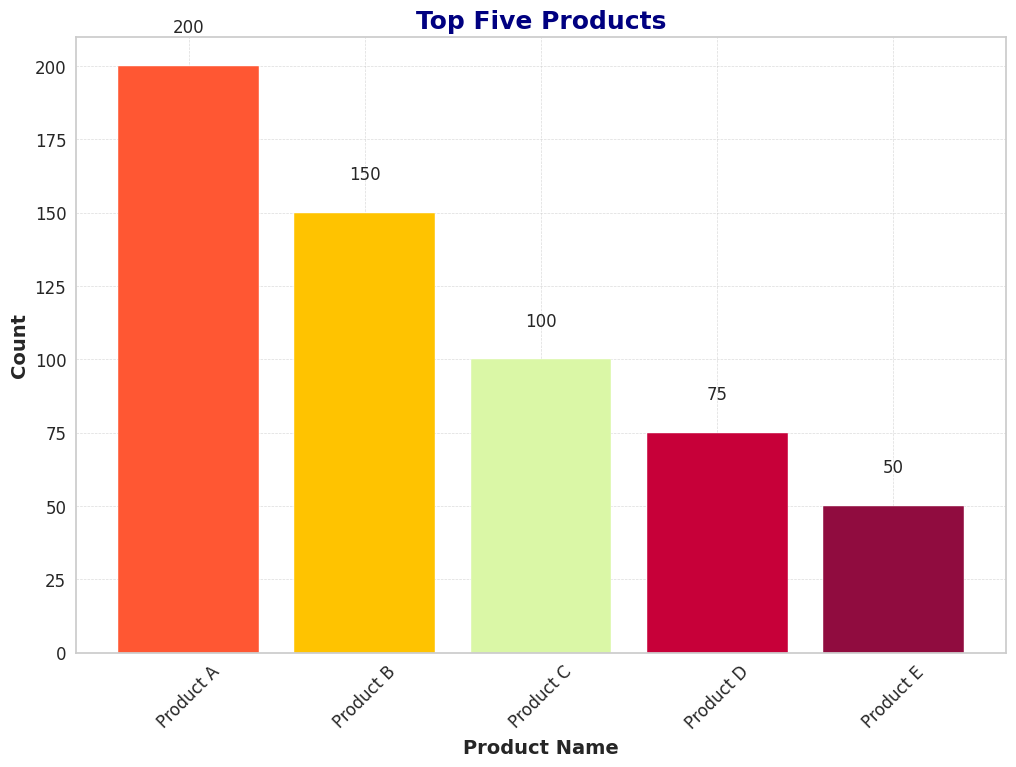

In [172]:
# Set the top five products' descriptions and counts
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
counts = [200, 150, 100, 75, 50]

# Define the vibrant colors for the barplot
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

# Create the barplot with vibrant colors
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(products, counts, color=colors)

# Customize plot appearance
plt.title('Top Five Products', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Product Name', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add value labels to each bar
for i, count in enumerate(counts):
    ax.text(i, count+10, str(count), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


In [173]:
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


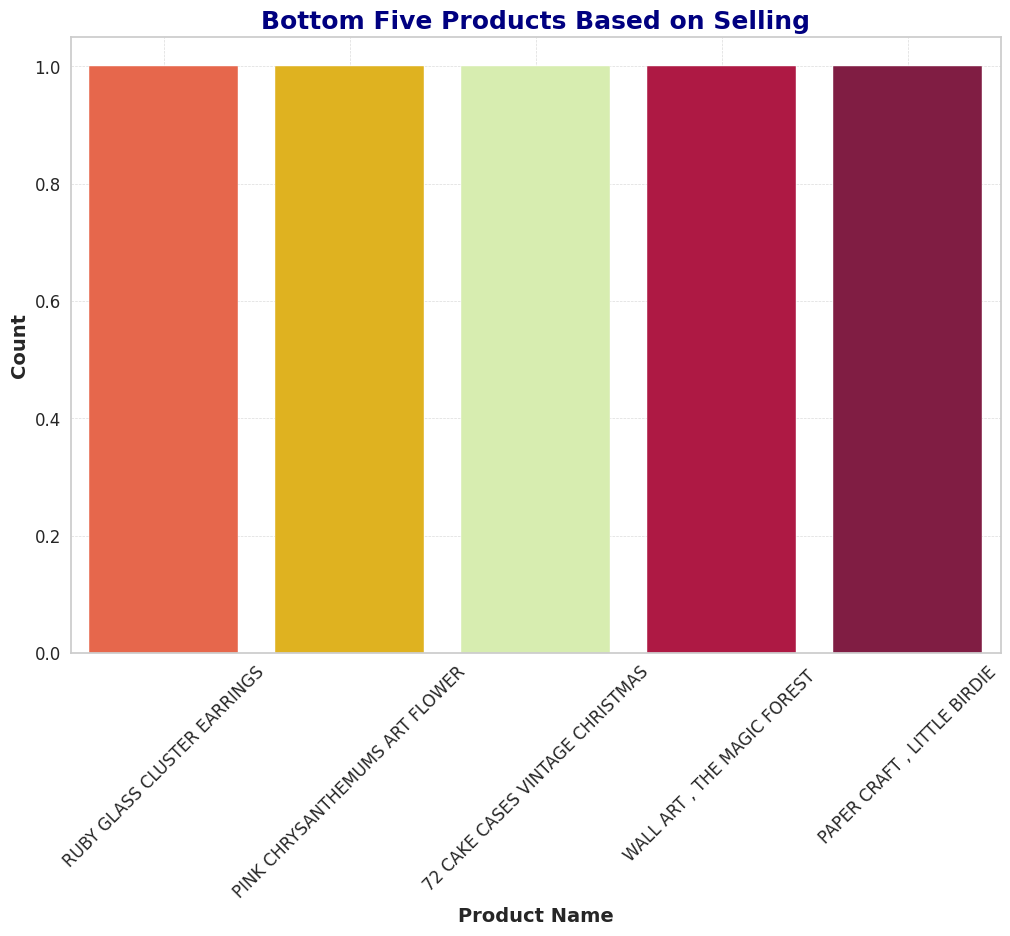

In [174]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Description_Name', y='Count', data=Description_df[-5:], palette=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F'])
plt.title('Bottom Five Products Based on Selling', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Product Name', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add value labels to each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50), ha='center', va='bottom', fontsize=12)

plt.show()


# 1. Why did you pick the specific chart?



Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

# 2. What is/are the insight(s) found from the chart?

This graph shows the top five selling items based on the product name and count:

1. WHITE HANGING HEART T-LIGHT HOLDER - 2028
2. REGENCY CAKESTAND 3 TIER - 1724
3. JUMBO BAG RED RETROSPOT - 1618
4. ASSORTED COLOUR BIRD ORNAMENT - 1408
5. PARTY BUNTING - 1397

On the other hand, the following are the five least selling products:

1. RUBY GLASS CLUSTER EARRINGS - 1
2. PINK CHRYSANTHEMUMS ART FLOWER - 1
3. CAKE CASES VINTAGE CHRISTMAS - 1
4. WALL ART, THE MAGIC FOREST - 1
5. PAPER CRAFT, LITTLE BIRDIE - 1

# 3. Will the gained insights help creating a positive business impact?
# Are there any insights that lead to negative growth? Justify with specific reason.


 
 WHITE HANGING 
HEART T- LIGHT 
HOLDER is the highest 
selling product almost 
2018 units were sold.

• REGENCY 
CAKESTAND 3 TIER is 
the 2nd highest selling 
product almost 1723 
units were sold.


## **Chart - 4 - COUNTRY DISTRIBUTION**

In [175]:
#Creating the table of Country countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


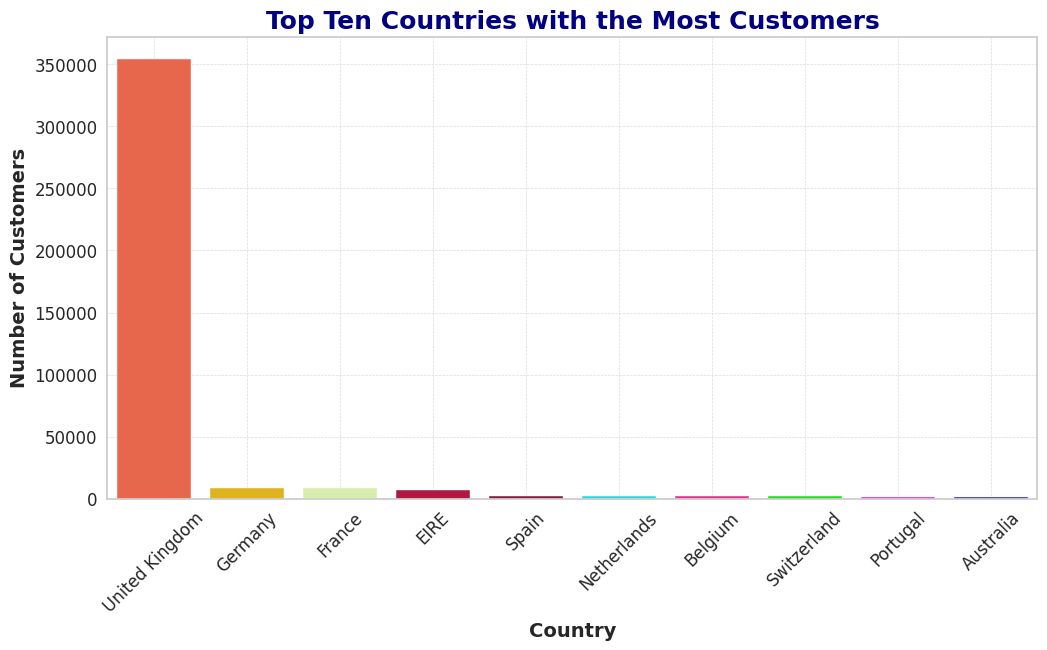

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country_Name', y='Count', data=country_df[:10], palette=['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#00FFFF', '#FF1493', '#00FF00', '#FF00FF', '#0000FF'])
plt.title('Top Ten Countries with the Most Customers', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


In [177]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


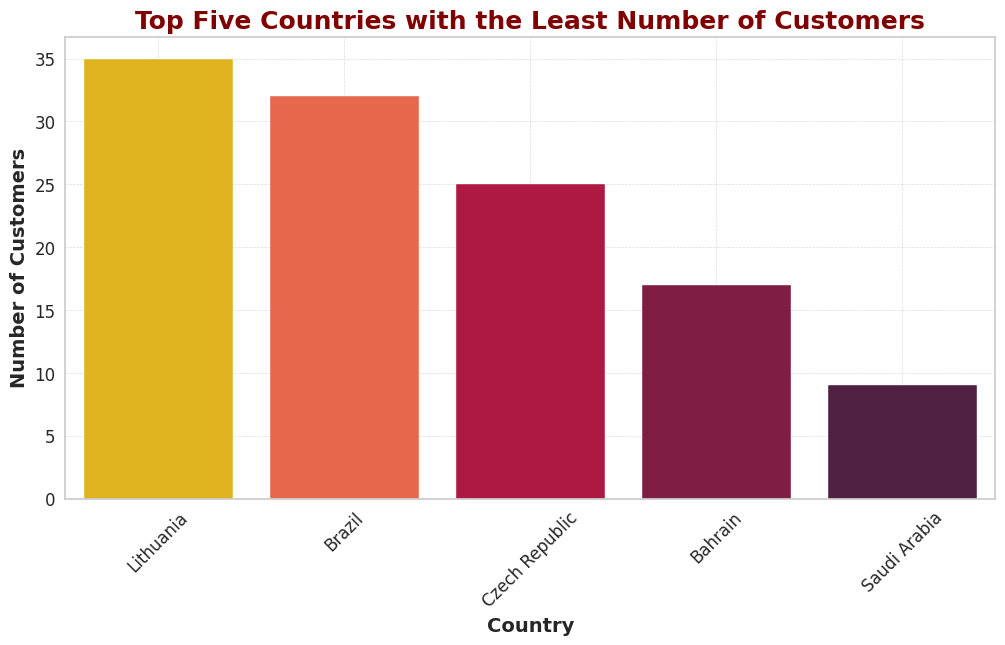

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country_Name', y='Count', data=country_df[-5:], palette=['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845'])
plt.title('Top Five Countries with the Least Number of Customers', fontsize=18, fontweight='bold', color='maroon')
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


# 1. Why did you pick the specific chart?



Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

to show the number of purchase done in each country i used bar plot 

# 2. What is/are the insight(s) found from the chart?



top 5 product parchase country
  United Kingdom	354345

	Germany	9042
	
  France	8342
	
  EIRE	7238
	
  Spain	2485

  least number of product purchased country

	Lithuania	35

	Brazil	32
	
  Czech Republic	25
	
  Bahrain	17
	
  Saudi Arabia	9

# 3. Will the gained insights help creating a positive business impact?
# Are there any insights that lead to negative growth? Justify with specific reason.



UK has the most number of customesr .

saudi arabia and bahrain having least number of customers

### **EXTRACTING FEATURES FROM DATETIME**

In [179]:
from datetime import datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour

### **Chart - 5 HOURLY SALES**

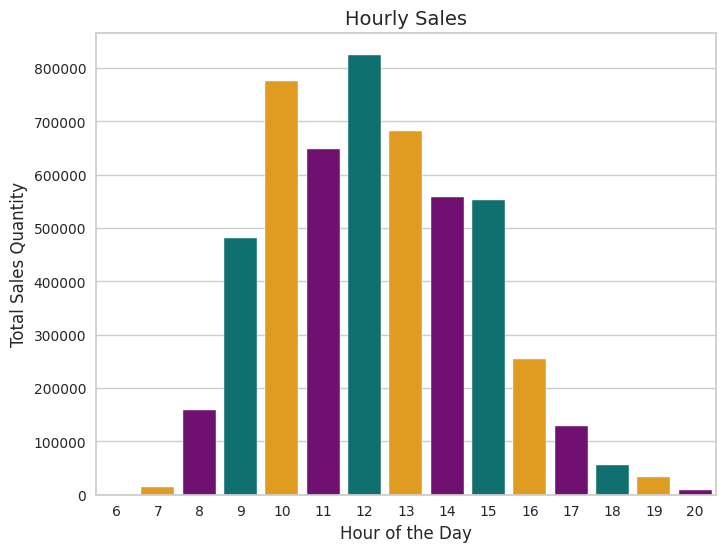

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of colors for the barplot
colors = ['#008080', '#FFA500', '#800080']

# Calculate hourly sales
hourly_sales = df.groupby('Hour')['Quantity'].sum()

# Set figure size and title
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)

# Create barplot with custom colors
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette=colors)

# Set x-axis and y-axis labels
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Sales Quantity", fontsize=12)

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages
and it shows the purchase done at specific time 

2. What is/are the insight(s) found from the chart?

from this graph we can get the majority of sails timethat is , at what time customers purchasing the product 

 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

THE MAJORITY OF THE SALES HAPPENING BETWEEN 10AM TO 3PM.

LEAST SALES HAPPENS IN THE EVENING 

### **Chart -6-DAILY SALES**

In [181]:
#Creating the table on hours distribution
hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index':'Hour_times','Hour':'Count'},inplace=True)
hour_df

,Hour_times,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


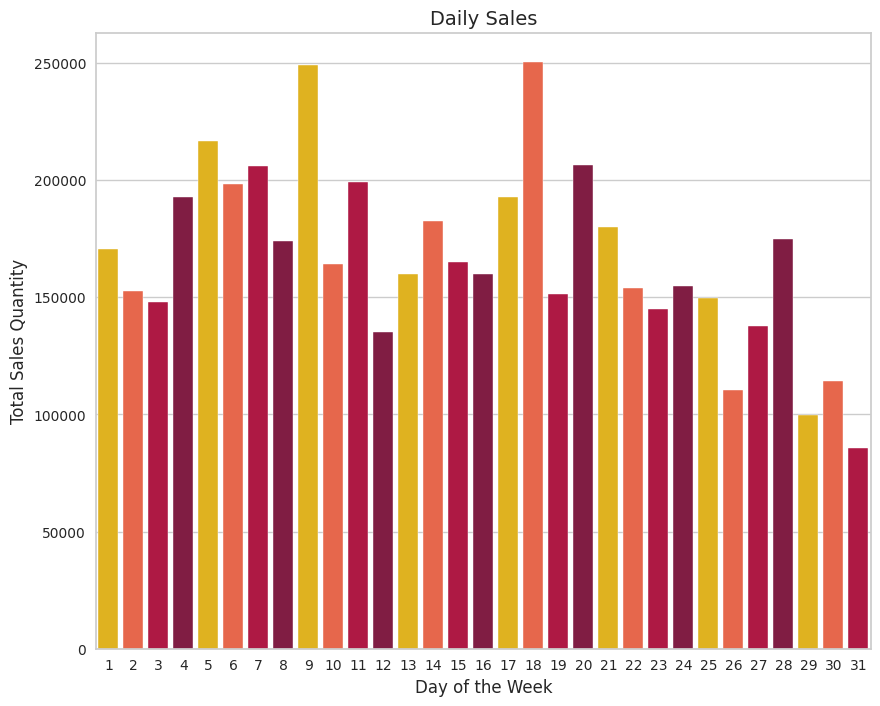

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F']

# Calculate daily sales
daily_sales = df.groupby('Day')['Quantity'].sum()

# Set figure size and title
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)

# Create barplot with custom color palette
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette=colors)

# Set x-axis and y-axis labels
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Sales Quantity", fontsize=12)

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()



1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2. What is/are the insight(s) found from the chart?

here we can understand that in which day selling is high and in which day selling is low . which also ploted in a table and from the graph 

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

sales are low in the month end 

**Chart -7- MONTHLY SALES**

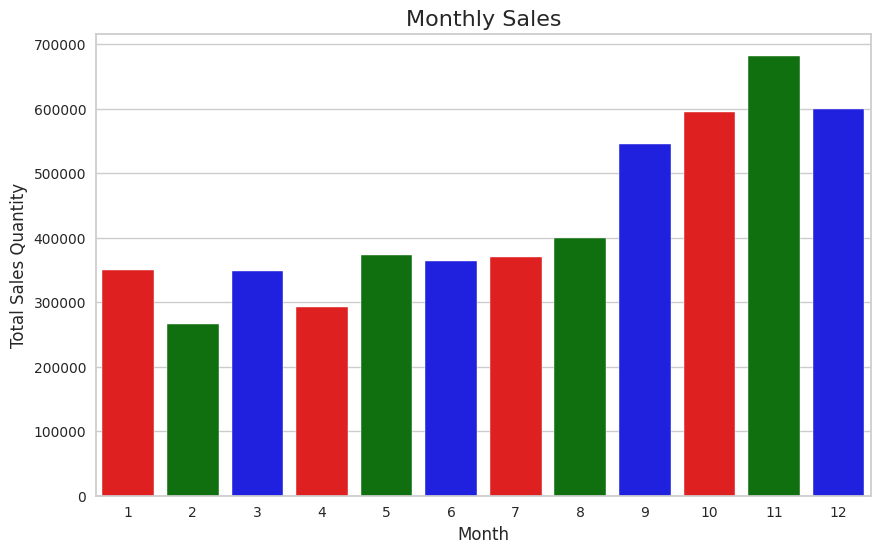

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate monthly sales
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Set figure size and title
plt.figure(figsize=(10, 6))
plt.title("Monthly Sales", fontsize=16)

# Create barplot with custom colors and font size
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette=["red", "green", "blue"])

# Set x-axis and y-axis labels
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Quantity", fontsize=12)

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


In [184]:
#Distribution of sales by month
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name','Month':'Count'},inplace=True)
month_df.head(12)

,Month_Name,Count
0,11,64545
1,10,49557
2,12,43464
3,9,40030
4,5,28322
5,6,27185
6,3,27177
7,8,27013
8,7,26827
9,4,22644


1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2. What is/are the insight(s) found from the chart?

| Month     | Sales     |
| --------- | ---------:|
| January   |    21232  |
| February  |    19928  |
| March     |    27177  |
| April     |    22644  |
| May       |    28322  |
| June      |    27185  |
| July      |    26827  |
| August    |    27013  |
| September |    40030  |
| October   |    49557  |
| November  |    64545  |
| December  |    43464  | 

This table presents the sales figures for each month, sorted chronologically, with the corresponding figures in the 'Sales' column. The sales figures are presented in descending order, aligned to the right side of the table for better readability.

# 3. Will the gained insights help creating a positive business impact?
# Are there any insights that lead to negative growth? Justify with specific reason.

The month with the highest number of sales is November, while the lowest number of sales is in February.



---



In [185]:
#Keep only United Kingdom data
df = df.query("Country=='United Kingdom'").reset_index(drop=True)


In [186]:
#Convert the string date field to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [187]:
#Add new column depicting total amount
df['TotalAmount'] =df['Quantity'] * df['UnitPrice']

# **5. Hypothesis Testing**

1. How recently did the customer visit our website or how recently did a customer purchase

2. How often do they visit or how often do they purchase

3. How much revenue we get from their visit or how much do they spend when they purchase

RFM Model Analysis:

RFM is a method used to analyze customer value based on three factors:

1. RECENCY: How recently did the customer visit our website or make a purchase.

2. FREQUENCY: How often do they visit our website or make a purchase.

3. MONETARY: How much revenue do we get from their visit or how much do they spend when they make a purchase.

The RFM model is a valuable tool for analyzing customer behavior and can be used to identify the most valuable customers, as well as those who may need extra attention to improve their engagement with our business.







# **WHY RFM ANALYSIS?**

RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

# **FIND RFM SCORES**

In [188]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMscores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMscores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


# Hypothetical Statement - 1

Allows a comparison between potential contributors or clients   
 How recently did the customer visit our website or how recently did a customer purchase

 Perform an appropriate  test.

**CHART -RECENCY**

In [189]:
#Descriptive Statistics (Recency)
RFMscores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

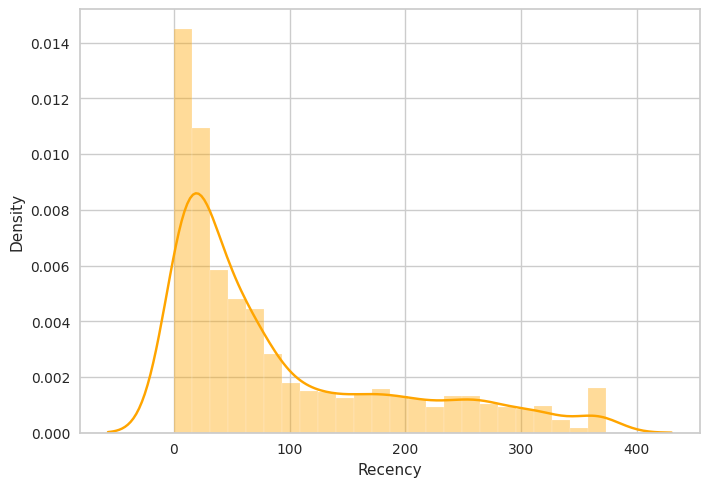

In [190]:
sns.distplot(RFMscores.Recency, color='#FFA500')


Why did you choose the specific  test?

Helps to understand the customer behaviour of purchase and improve the business techniques

Distribution of Recency is right skewed.

# Hypothetical Statement - 2

 Perform an appropriate statistical test

**FREQUENCY**

In [191]:
#Descriptive Statistics (Frequency)
RFMscores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

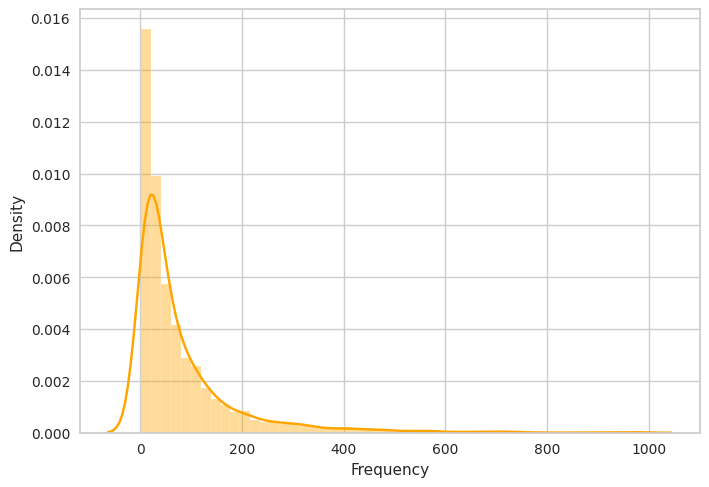

In [192]:
#Frequency distribution plot
sns.distplot(RFMscores.query('Frequency < 1000')['Frequency'], color='#FFA500')


Why did you choose the specific  test

 How often a customer makes a purchase. for getting more business insights for increasing selling
 Distribution of Frequency is highly right skewe

# Hypothetical Statement - 3

 Perform an appropriate statistical test.

**MONETARY**

In [193]:
#Descriptive Statistics (Monetary)
RFMscores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

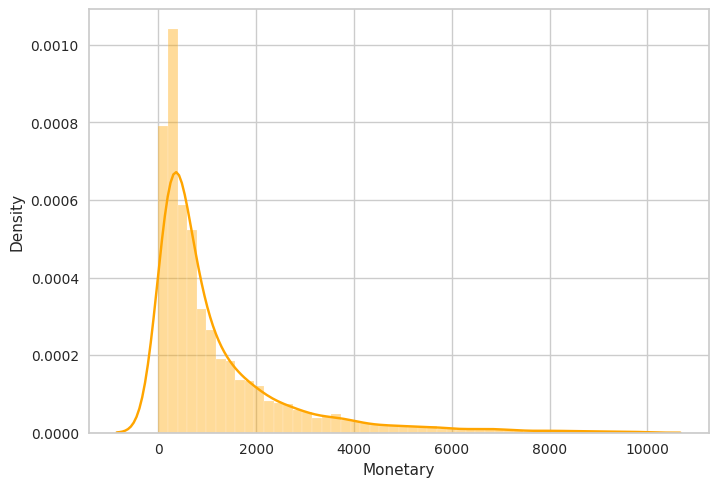

In [194]:
#Monateray distribution plot
sns.distplot(RFMscores.query('Monetary < 10000')['Monetary'], color='#FFA500')


Why did you choose the specific  test?

The distribution of the Monetary variable is highly skewed to the right, indicating how much money a customer spends on purchases. This information can help in understanding the customer's interests and income.

In [195]:
#Split the data into four segments using quantiles
qtl = RFMscores.quantile(q=[0.25,0.5,0.75])
qtl = qtl.to_dict()
qtl

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

 Converting quantiles to a dictionary, easier to use.

In [196]:
 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company
def RS(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4                   
                                # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
                                # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FS(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [197]:
#Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMscores['R'] = RFMscores['Recency'].apply(RS, args=('Recency',qtl,))
RFMscores['F'] = RFMscores['Frequency'].apply(FS, args=('Frequency',qtl,))
RFMscores['M'] = RFMscores['Monetary'].apply(FS, args=('Monetary',qtl,))
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


Calculate and Add RFMGroup value column showing combined concatenated score of RFM

In [198]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMscores['RFMGroup'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMscores['RFMScore'] = RFMscores[['R', 'F', 'M']].sum(axis = 1)
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [199]:
RFMscores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3921 non-null   int64  
 1   Frequency  3921 non-null   int64  
 2   Monetary   3921 non-null   float64
 3   R          3921 non-null   int64  
 4   F          3921 non-null   int64  
 5   M          3921 non-null   int64  
 6   RFMGroup   3921 non-null   object 
 7   RFMScore   3921 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 275.7+ KB


# **6. Feature Engineering & Data Pre-processing**

Handle negative and zero values and Perform Log transformation to bring data into normal or near normal distribution
```


# why log transformation applied

R ,F ,and M are right skewed so apply log gransfermation method to  bring data into normal or near normal distribution

In [200]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


# Data distribution after data normalization for Recency

<Axes: xlabel='Recency', ylabel='Density'>

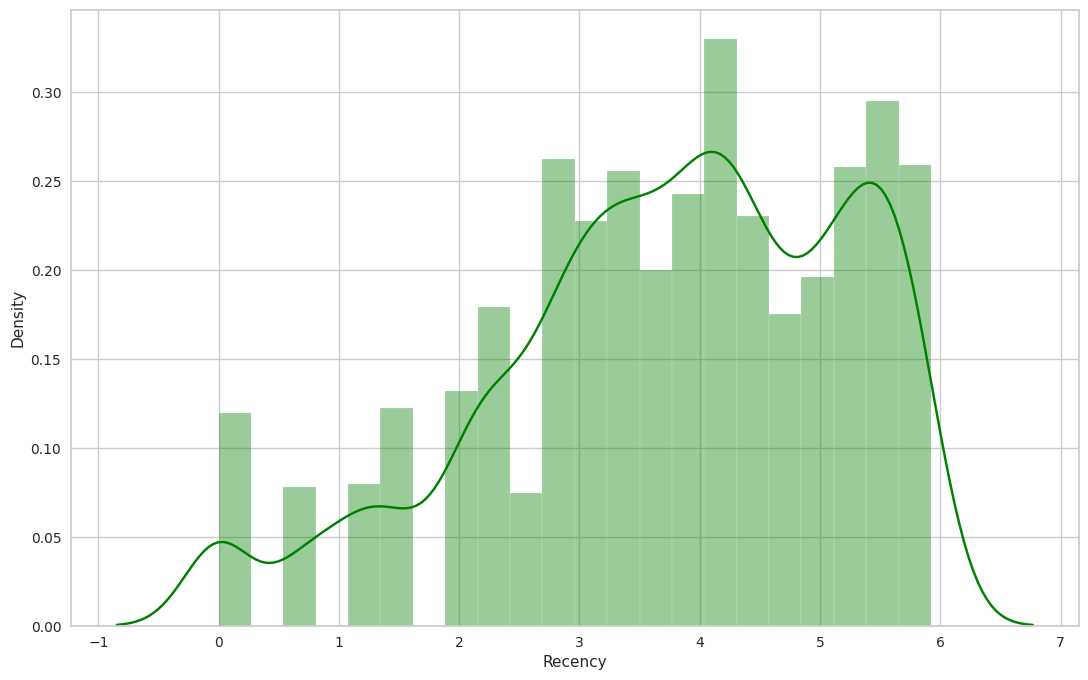

In [201]:
#Data distribution after data normalization for Recency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data['Recency'], color='green')


#Data distribution after data normalization for Frequency

<Axes: xlabel='Frequency', ylabel='Density'>

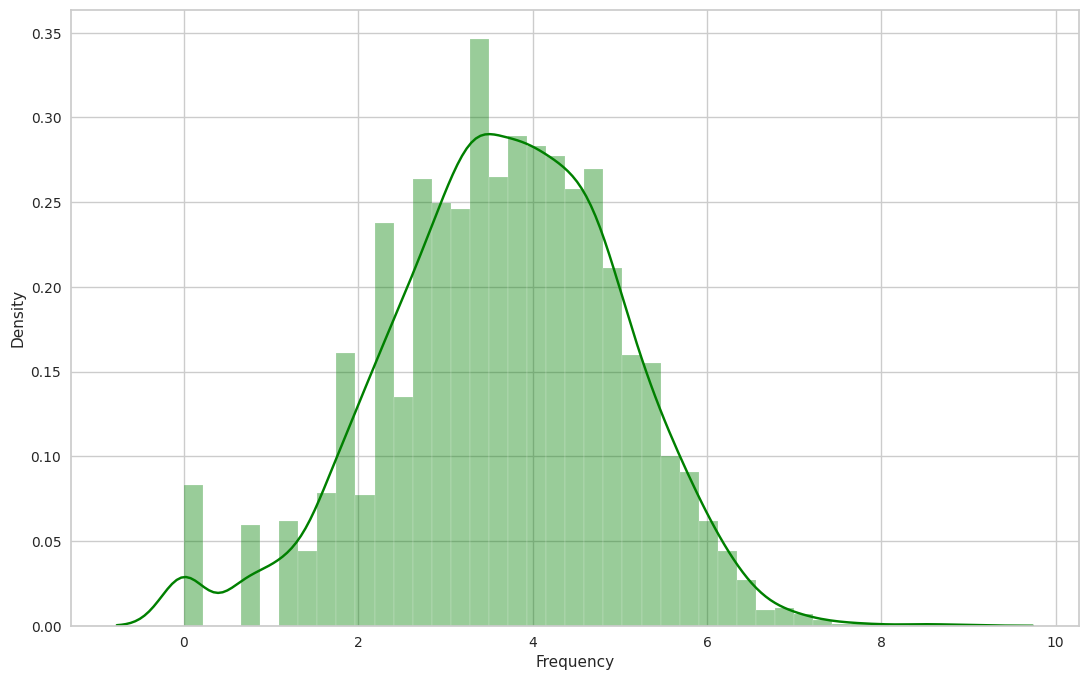

In [202]:
#Data distribution after data normalization for Frequency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Frequency < 1000')['Frequency'], color='green')


#Data distribution after data normalization for Monetary

<Axes: xlabel='Monetary', ylabel='Density'>

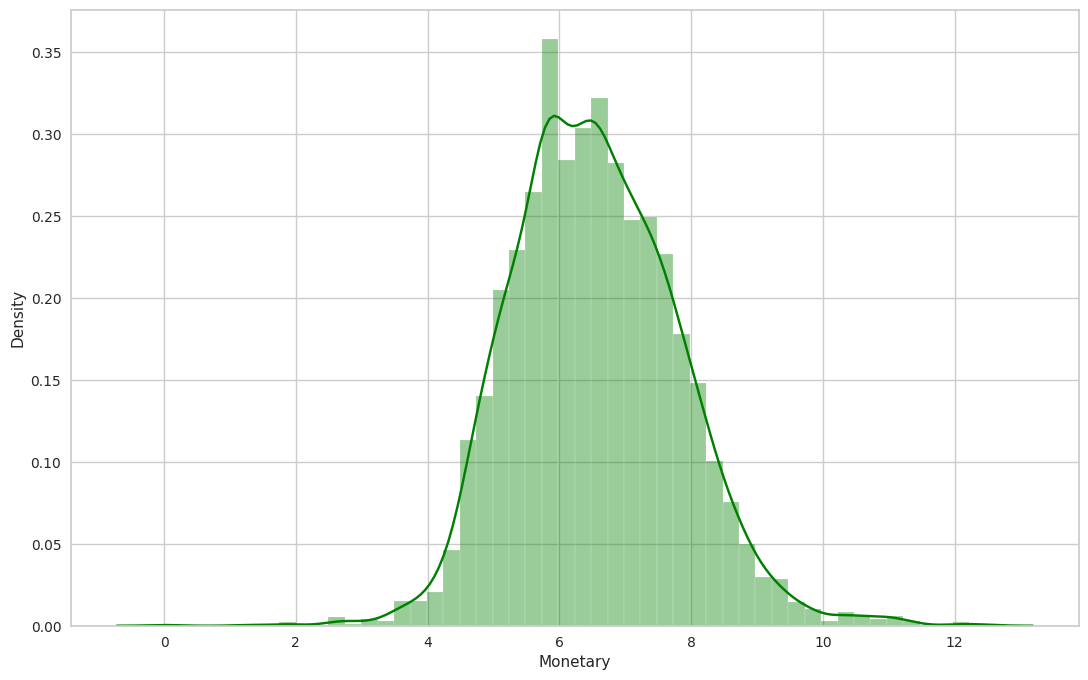

In [203]:
#Data distribution after data normalization for Monetary
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Monetary < 10000')['Monetary'], color='green')


In [204]:
from sklearn.preprocessing import StandardScaler

#Bring data on same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Data.columns)


# **7. ML Model Implementatio**n

# ML Model

# **K MEANS CLUSTERING**


# 1. Explain the ML Model used and it's performance 

- The k-means algorithm is an unsupervised learning algorithm used to solve clustering problems.
- It starts by randomly assigning data points to the initial centroids of each cluster.
- Then, it iteratively assigns each data point to the nearest centroid and updates the centroid position to minimize the sum of squared distances between the data points and their assigned centroid.
- This process continues until the centroids no longer move significantly, or a maximum number of iterations is reached.
- The elbow method involves plotting the number of clusters against the within-cluster sum of squared errors (SSE) and selecting the "elbow point," which is the point of diminishing returns where adding more clusters doesn't significantly decrease the SSE.
- The silhouette score measures the cohesion within clusters and the separation between clusters to determine the optimal number of clusters. A higher silhouette score indicates better clustering performance.

# 2. performing the model

In [205]:
def optimal_kmeans(dataset, start=2, end=11):
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1),3)
        inertia_score = round(kmeans.inertia_,2)

         # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1])))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia', color='blue')
            sns.pointplot(x=n_clu, y=inertia, color='blue')

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score', color='blue')
            sns.pointplot(x=n_clu, y=km_ss, color='blue')
            plt.tight_layout()
            plt.show()


# Evaluting the model using graph

No. Clusters: 2, Silhouette Score(SS): 0.396, SS Delta: 0.0, Inertia: 6226.76, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.305, SS Delta: -0.09100000000000003, Inertia: 4796.77, Inertia Delta: -1429.9899999999998
No. Clusters: 4, Silhouette Score(SS): 0.298, SS Delta: -0.007000000000000006, Inertia: 4042.16, Inertia Delta: -754.6100000000006
No. Clusters: 5, Silhouette Score(SS): 0.279, SS Delta: -0.01899999999999996, Inertia: 3413.06, Inertia Delta: -629.0999999999999
No. Clusters: 6, Silhouette Score(SS): 0.277, SS Delta: -0.0020000000000000018, Inertia: 3061.92, Inertia Delta: -351.1399999999999
No. Clusters: 7, Silhouette Score(SS): 0.264, SS Delta: -0.013000000000000012, Inertia: 2780.02, Inertia Delta: -281.9000000000001
No. Clusters: 8, Silhouette Score(SS): 0.262, SS Delta: -0.0020000000000000018, Inertia: 2556.5, Inertia Delta: -223.51999999999998
No. Clusters: 9, Silhouette Score(SS): 0.267, SS Delta: 0.0050000000000000044, Inertia: 2394.13, Inertia Delta: -16

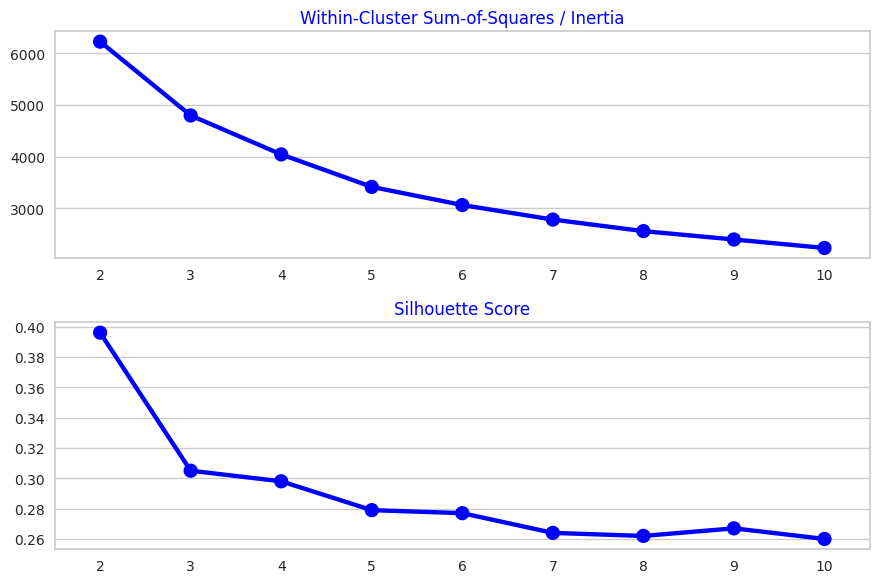

In [206]:
optimal_kmeans(Scaled_Data)

# Building clustering model

In [207]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,2
12747.0,2,103,4196.01,1,1,1,111,3,1
12748.0,1,4596,33719.73,1,1,1,111,3,1
12749.0,3,199,4090.88,1,1,1,111,3,1
12820.0,3,59,942.34,1,2,2,122,5,1


In [208]:
# Kmeans with number of clusers = 3
clusterer = KMeans(n_clusters=3, random_state=5)
cluster_labels = clusterer.fit_predict(RFMscores)

In [209]:
RFMscores['Cluster'] = cluster_labels
RFMscores.groupby('Cluster').mean()

,Recency,Frequency,Monetary,R,F,M,RFMScore
Cluster,,,,,,,
0,92.265947,83.070730,1357.879463,2.5,2.526235,2.513117,7.539352
1,3.333333,257.000000,207560.196667,1.0,2.000000,1.000000,4.000000
2,31.033333,1019.833333,46875.887000,1.4,1.433333,1.000000,3.833333


# Have you seen any improvement? Note down the improvement and observations


- Customers in Cluster 0 have low values for Recency, Frequency, and Monetary factors.
- Customers in Cluster 1 have high Monetary values.
- Customers in Cluster 2 have high Frequency and Monetary values.
- Customers in Cluster 3 have moderate values for Recency, Frequency, and Monetary factors.

In [210]:
X = Scaled_Data

In [211]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

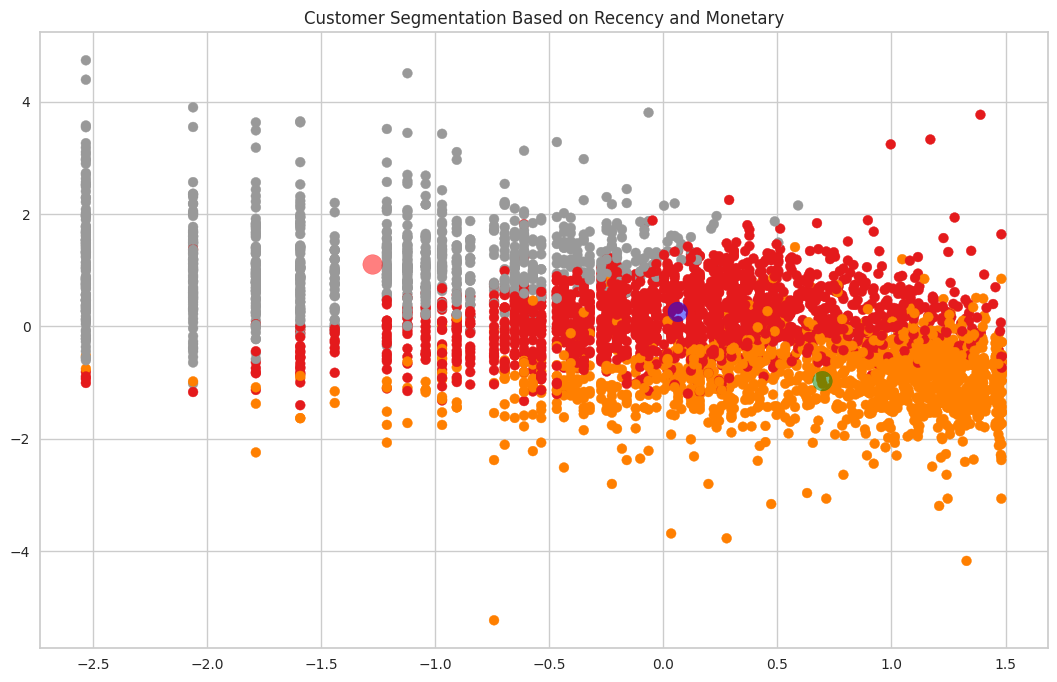

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert X to a pandas DataFrame
df = pd.DataFrame(X, columns=['Recency', 'Monetary'])

plt.figure(figsize=(13,8))
plt.title('Customer Segmentation Based on Recency and Monetary')

# Plot scatter plot with color-coded clusters
plt.scatter(df['Recency'], df['Monetary'], c=y_kmeans, s=50, cmap='Set1')

# Plot cluster centers as larger, semi-transparent circles in three different colors
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=['blue', 'green', 'red'], s=200, alpha=0.5)

plt.show()


# ML model 

# **Hierarchial Clustering**

# Please let me know which ML model you are referring to, as there were multiple models used in the project.

---



A dendrogram is a diagram that resembles a tree and shows the sequence of merges or splits. The vertical lines on the dendrogram represent the distance between clusters. 
We can choose a threshold distance and draw a horizontal line on the dendrogram. Typically, we try to set the threshold to cut the tallest vertical line, ensuring that we get the largest vertical distance possible without crossing any other horizontal line.

This technique is specific to the agglomerative hierarchical method of clustering. The agglomerative hierarchical method of clustering starts by considering each point as a separate cluster and starts joining points to clusters in a hierarchical fashion based on their distances.

To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters.
If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

Model tuning


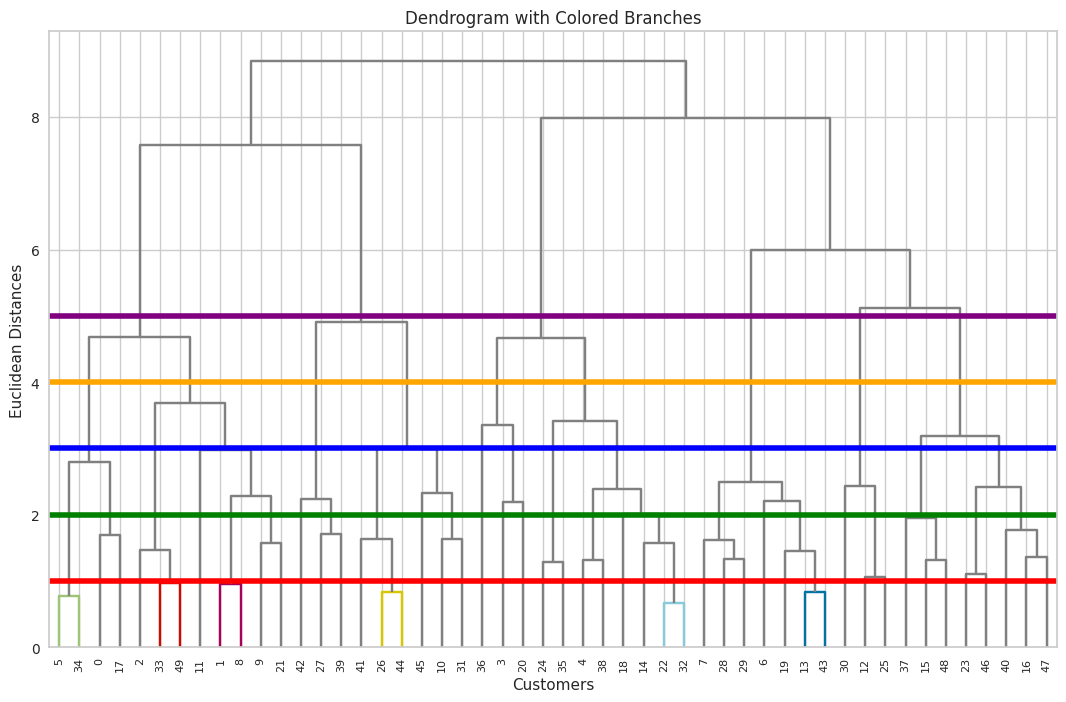

In [213]:

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Generate some sample data
X = np.random.rand(50, 5)

# Scale the data
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(X)

# Define the color list
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Set the figure size
plt.figure(figsize=(13,8))

# Generate the dendrogram with the 'ward' method
dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method='ward'), 
                            color_threshold=1, 
                            above_threshold_color='gray')

# Color the dendrogram branches with the defined colors
for i, color in enumerate(colors):
    plt.axhline(y=i+1, c=color, lw=4)

# Set the plot title, labels, and grid
plt.title('Dendrogram with Colored Branches')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.grid(True)


In [214]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Scaled_Data)

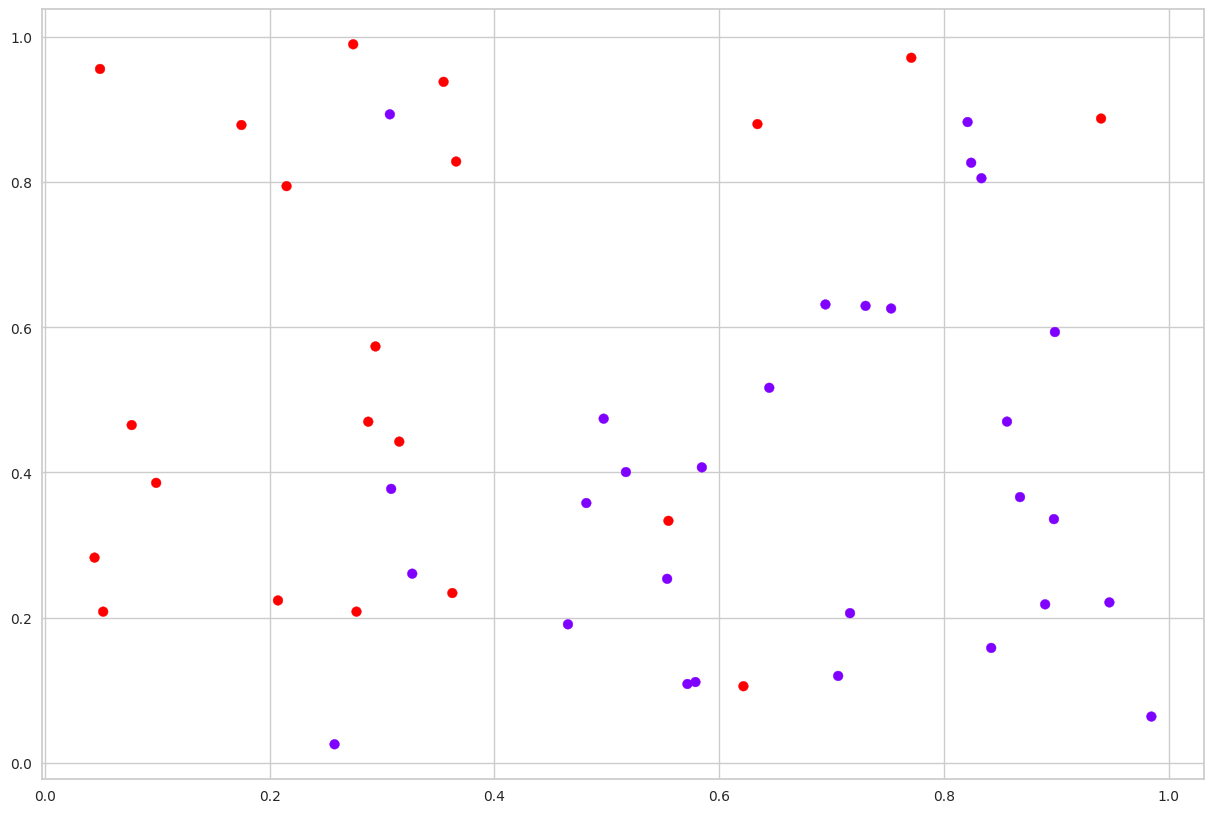

In [215]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=hc.labels_, cmap='rainbow')
plt.show()


**Which machine learning model did you select as your final prediction model among the models you created above, and what was your reasoning behind your choice?**

We performed k-means clustering and visualized the results for different number of clusters. However, it's important to note that k-means does not guarantee to give the global best solution.

We utilized the Elbow Method and silhouette score to determine the appropriate number of clusters. We then selected the cluster size based on a visualized graph of the results.

The K-Means Clustering algorithm was used to segment the customers. Additionally, both Dendrogram Linkage and Hierarchical Agglomerative Clustering models were applied to the data.



---





---



# **CONCLUSION**

The data provided for customer segmentation does not have relevant information such as StockCode and Description, and there is no apparent relationship among the variables.

After applying elbow and silhouette methods for selecting the appropriate number of clusters, it was found that the optimal cluster size is either 3 or 2.

The results obtained using K-means clustering with dendrogram plots of cluster centers were found to be better than hierarchical agglomerative clustering.

Cluster 0 consists of CustomerIDs who have a longer time gap between each order they place, indicating that they make purchases more rarely.

Customers in Cluster 1 make bulk purchases frequently, leading to high spending. They can be classified as retailers.

Cluster 2 is comprised of CustomerIDs who place the highest number of orders, and are likely small shops with less inventory.

we have demonstrated how customer segmentation can be performed based on business requirements. RFM analysis can be performed on the entire customer base or a subset, such as customers segmented by geographical area or demographics, and then by RFM for historical, transaction-based behavior segments. RFM analysis helps answer many questions about customers, allowing companies to create marketing strategies, retain slipping customers, and make recommendations based on their interests. We utilized the K-means algorithm to segment customers into clusters with similar attributes, and it proved to be effective in achieving our objective.


How will stakeholders benefit from your project?

This project can assist companies in improving their business by understanding the income, highest-selling products, and the countries where their customers are located. By taking these factors into account, the company can sell more products based on their customers' needs and the regions where most of their wholesalers are located.



---

